In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from processing import load_instance
from collections import Counter

In [3]:
# Load the mk11-b2 instance
graph = load_instance('instances/mk11-b2.vc')
print(f"Graph loaded: {len(graph.V
                           )} vertices, {len(graph.E)} edges")

Graph loaded: 6930 vertices, 20779 edges


In [7]:
# Create NetworkX graph for analysis and visualization
G = nx.Graph()
G.add_nodes_from(graph.V)
# Filter edges to ensure they are valid 2-tuples
valid_edges = [tuple(e) for e in graph.E if len(e) == 2]
G.add_edges_from(valid_edges)

# Basic statistics
print(f"Vertices: {G.number_of_nodes()}, Edges: {G.number_of_edges()}, Density: {nx.density(G):.4f}")

Vertices: 6930, Edges: 20776, Density: 0.0009


In [8]:
# Degree distribution analysis
degrees = [G.degree(n) for n in G.nodes()]
print(f"Degree - Avg: {np.mean(degrees):.1f}, Min: {min(degrees)}, Max: {max(degrees)}")

Degree - Avg: 6.0, Min: 3, Max: 24


In [ ]:
# Visualize degree distribution
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (mk11-b2)')
plt.grid(True, alpha=0.3)

# Cumulative distribution
plt.subplot(1, 2, 2)
sorted_degrees = sorted(degrees)
cumulative = np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)
plt.plot(sorted_degrees, cumulative, linewidth=2)
plt.xlabel('Degree')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Degree Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Visualize a subgraph (since the full graph is too large to visualize meaningfully)
# Option 1: Sample random vertices
sample_size = 100
sampled_nodes = np.random.choice(list(G.nodes()), size=min(sample_size, len(G.nodes())), replace=False)
subgraph = G.subgraph(sampled_nodes)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, k=0.5, iterations=50, seed=42)

# Draw nodes with colors based on degree
node_colors = [subgraph.degree(n) for n in subgraph.nodes()]
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, 
                       node_size=100, cmap='viridis', alpha=0.8)
nx.draw_networkx_edges(subgraph, pos, alpha=0.3, width=0.5)

plt.title(f'Random Subgraph of mk11-b2 ({sample_size} vertices)')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', 
                                   norm=plt.Normalize(vmin=min(node_colors), 
                                                     vmax=max(node_colors))),
            label='Degree', ax=plt.gca())
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Option 2: Visualize the ego graph of highest degree node
max_degree_node = max(G.nodes(), key=lambda n: G.degree(n))
ego = nx.ego_graph(G, max_degree_node, radius=1)

print(f"Visualizing ego graph of node {max_degree_node} (degree: {G.degree(max_degree_node)})")
print(f"Ego graph has {ego.number_of_nodes()} vertices and {ego.number_of_edges()} edges")

plt.figure(figsize=(14, 12))
pos = nx.spring_layout(ego, k=1, iterations=50, seed=42)

# Color the center node differently
node_colors = ['red' if n == max_degree_node else 'lightblue' for n in ego.nodes()]
node_sizes = [500 if n == max_degree_node else 100 for n in ego.nodes()]

nx.draw_networkx_nodes(ego, pos, node_color=node_colors, 
                       node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(ego, pos, alpha=0.2, width=0.8)
nx.draw_networkx_labels(ego, pos, 
                       labels={max_degree_node: str(max_degree_node)},
                       font_size=12, font_weight='bold')

plt.title(f'Ego Graph of Highest Degree Node (Node {max_degree_node})')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"\n=== Clustering Analysis ===")
print(f"Average clustering coefficient: {avg_clustering:.4f}")

# Sample clustering coefficients
sample_nodes = np.random.choice(list(G.nodes()), size=min(1000, len(G.nodes())), replace=False)
clustering_coeffs = [nx.clustering(G, n) for n in sample_nodes]

plt.figure(figsize=(10, 5))
plt.hist(clustering_coeffs, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Clustering Coefficients (sample of 1000 nodes)')
plt.axvline(avg_clustering, color='red', linestyle='--', linewidth=2, 
            label=f'Average: {avg_clustering:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Visualize the adjacency matrix structure (downsampled)
# For large graphs, we sample rows/columns to show structure
n_sample = min(500, len(G.nodes()))
sampled = sorted(np.random.choice(list(G.nodes()), size=n_sample, replace=False))

# Create adjacency matrix for sampled nodes
adj_matrix = nx.to_numpy_array(G, nodelist=sampled)

plt.figure(figsize=(12, 10))
plt.imshow(adj_matrix, cmap='binary', interpolation='nearest', aspect='auto')
plt.colorbar(label='Edge exists')
plt.title(f'Adjacency Matrix Structure (sampled {n_sample} nodes)')
plt.xlabel('Node Index (sampled)')
plt.ylabel('Node Index (sampled)')
plt.tight_layout()
plt.show()

print(f"Sparsity: {1 - np.count_nonzero(adj_matrix) / adj_matrix.size:.4f}")

In [ ]:
# Top nodes by centrality measures
print("\n=== Top 10 Nodes by Different Centrality Measures ===")

# Degree centrality
degree_cent = nx.degree_centrality(G)
top_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nDegree Centrality:")
for node, cent in top_degree:
    print(f"  Node {node}: {cent:.4f} (degree: {G.degree(node)})")

# Sample betweenness centrality (expensive for large graphs)
print("\nComputing betweenness centrality (sampled)...")
between_cent = nx.betweenness_centrality(G, k=min(500, len(G.nodes())), seed=42)
top_between = sorted(between_cent.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nBetweenness Centrality (sampled):")
for node, cent in top_between:
    print(f"  Node {node}: {cent:.6f}")

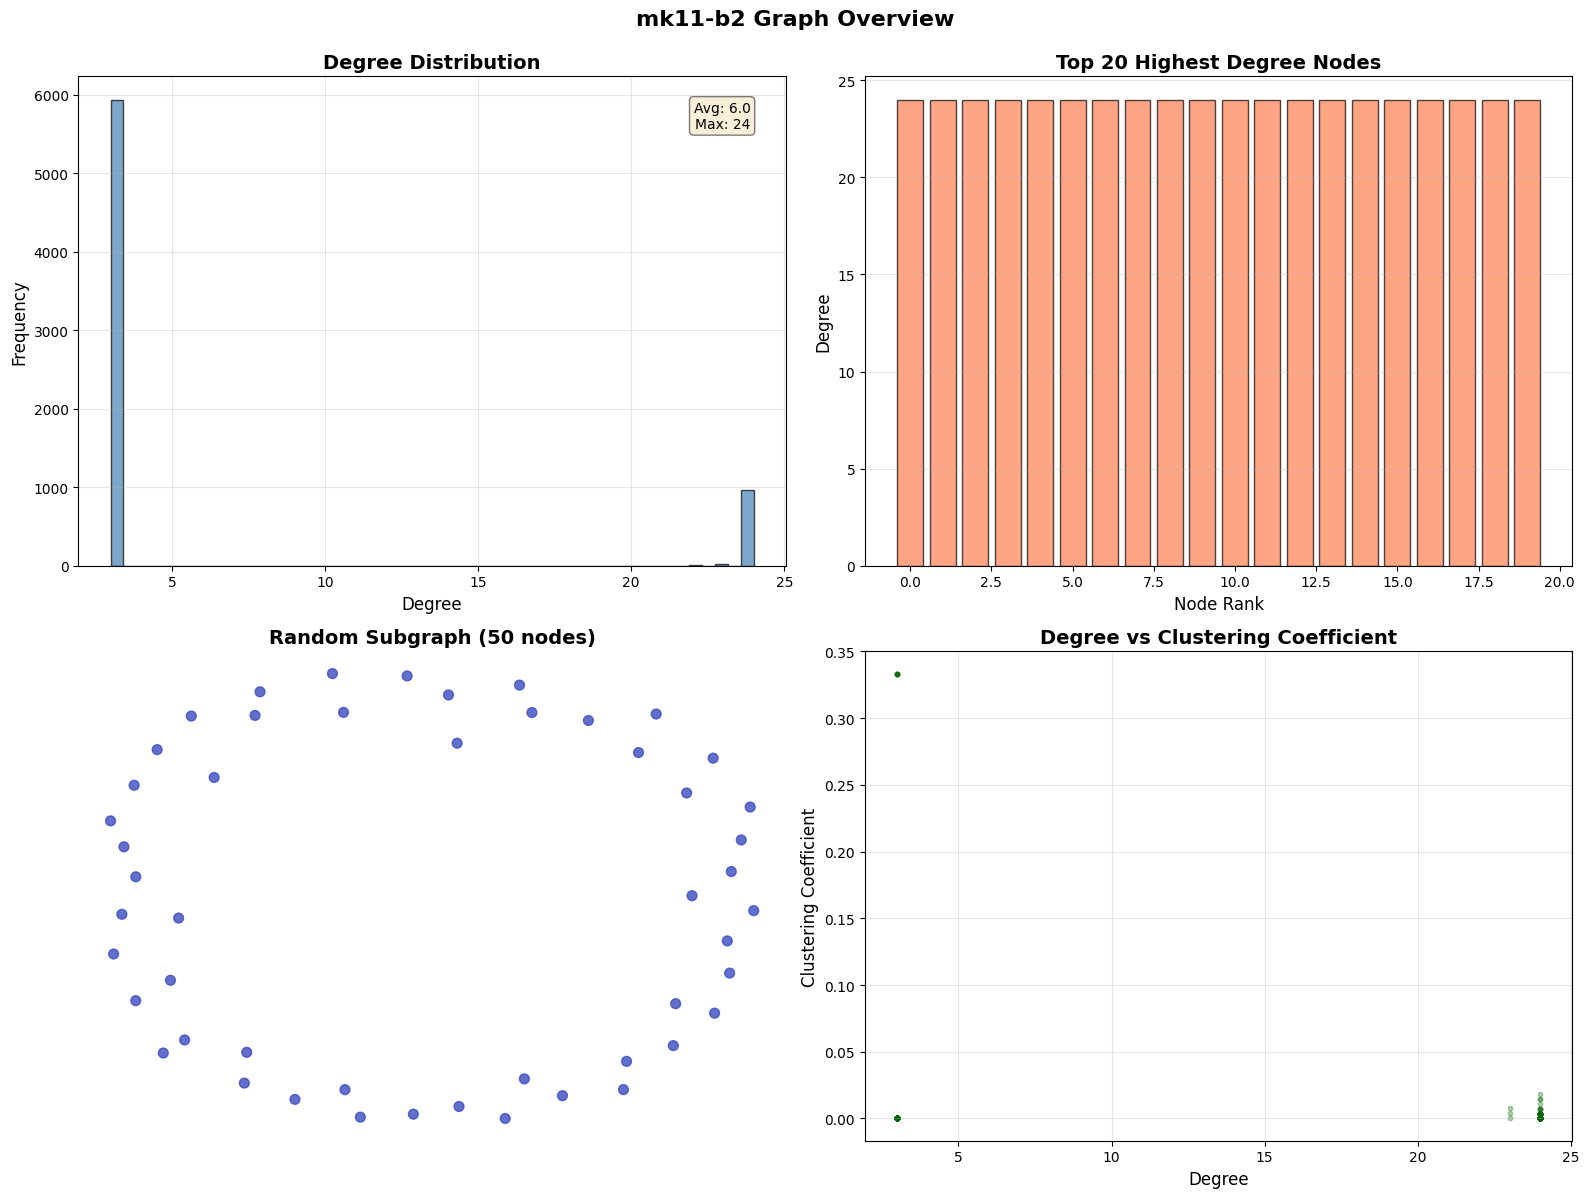

In [9]:
# Summary visualization: Multi-panel overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Degree distribution
ax1 = axes[0, 0]
ax1.hist(degrees, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Degree', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Degree Distribution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.text(0.95, 0.95, f'Avg: {np.mean(degrees):.1f}\nMax: {max(degrees)}', 
         transform=ax1.transAxes, va='top', ha='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Top 20 highest degree nodes
ax2 = axes[0, 1]
top_20_degrees = sorted([(n, G.degree(n)) for n in G.nodes()], key=lambda x: x[1], reverse=True)[:20]
nodes_top, degrees_top = zip(*top_20_degrees)
ax2.bar(range(20), degrees_top, color='coral', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Node Rank', fontsize=12)
ax2.set_ylabel('Degree', fontsize=12)
ax2.set_title('Top 20 Highest Degree Nodes', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Small subgraph visualization
ax3 = axes[1, 0]
small_sample = 50
small_nodes = np.random.choice(list(G.nodes()), size=min(small_sample, len(G.nodes())), replace=False)
small_subgraph = G.subgraph(small_nodes)
pos_small = nx.spring_layout(small_subgraph, k=0.8, iterations=30, seed=42)
node_colors_small = [small_subgraph.degree(n) for n in small_subgraph.nodes()]
nx.draw_networkx_nodes(small_subgraph, pos_small, node_color=node_colors_small,
                       node_size=50, cmap='coolwarm', alpha=0.8, ax=ax3)
nx.draw_networkx_edges(small_subgraph, pos_small, alpha=0.2, width=0.5, ax=ax3)
ax3.set_title(f'Random Subgraph ({small_sample} nodes)', fontsize=14, fontweight='bold')
ax3.axis('off')

# 4. Degree vs Clustering coefficient (sample)
ax4 = axes[1, 1]
sample_for_clustering = min(1000, len(G.nodes()))
sampled_for_plot = np.random.choice(list(G.nodes()), size=sample_for_clustering, replace=False)
deg_for_plot = [G.degree(n) for n in sampled_for_plot]
clust_for_plot = [nx.clustering(G, n) for n in sampled_for_plot]
ax4.scatter(deg_for_plot, clust_for_plot, alpha=0.3, s=10, color='darkgreen')
ax4.set_xlabel('Degree', fontsize=12)
ax4.set_ylabel('Clustering Coefficient', fontsize=12)
ax4.set_title('Degree vs Clustering Coefficient', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.suptitle('mk11-b2 Graph Overview', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()